# SQL Project 

> Name  : Muktianando
> 
> Date    : 07/03/2022
> 
> Source : [https://www.kaggle.com/bzynpb/data-visualisation-of-google-play-store-apps/data](https://www.kaggle.com/bzynpb/data-visualisation-of-google-play-store-apps/data)

# ASK

Get the insight in data include :

1.  What the most category by rating and users ?
2. find most download app name by category ?
3. what total review each category ?

# Prepare

To prepare data i changed the type file from csv to xls for import the data in sql management system. after that, i cleaned the data by 'nan' word to 'blank' value for define the null value. because, a null value and '0' value is such different types. this explaination about coloumn from table 'googleplays\_data'  :

> - App: Google store app name
> - Category: App category on the google store
> - Rating: Google store rating value
> - Reviews: Number of the reviews
> - Size: Size of the app
> - Type: Price of the app
> - Content Rating:
> - Genres: App type on the google store
> - Latest Updated: Latest update time
> - Current Ver: latest version of the app
> - Android Ver: Latest android version to use properly

# Process 

- Data Cleaning (total missing value and duplicate)
- Data outlier

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sn 

In [3]:
df = pd.read_csv(r'E:\Portofolio\Sql Project 3\Data\googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.shape

(10841, 13)

## Define Datatype and fix it

In [5]:
df.info()
## info in 'reviews' coloumn must be a float, and why is 'object' datatype, so we define what wrong in coloumn review 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
df[~df['Reviews'].str.isdigit()] ## is find in id '10471' in reviews is nota float 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [7]:
df = df.drop(index = 10472) ##drop label with index 10472

In [8]:
df.shape #now has a 10840 rows

(10840, 13)

In [9]:
df["Reviews"] = df["Reviews"].astype('float64') ## Change datatype 'Reviews'
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  float64
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.2+ MB


In [10]:
df.describe()

,Rating,Reviews
count,9366.000000,1.084000e+04
mean,4.191757,4.441529e+05
std,0.515219,2.927761e+06
min,1.000000,0.000000e+00
25%,4.000000,3.800000e+01
50%,4.300000,2.094000e+03
75%,4.500000,5.477550e+04
max,5.000000,7.815831e+07


## Find & Drop missing values

In [11]:
df.isnull().sum() #Define null value 

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [12]:
df = df.dropna() ## Drop null value

In [13]:
df.shape ## Now df has a 9360 values

(9360, 13)

## Drop Duplicated

In [14]:
df.duplicated().sum() 

474

In [15]:
df = df.drop_duplicates()  
df.shape

(8886, 13)

## Find correlation and outlier

In [16]:
from datetime import timedelta
import datetime 

In [17]:
df["Last Updated"]=pd.to_datetime(df["Last Updated"]) ## Change value in datetime by input pd command

In [18]:
df["Last Updated"]

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10834   2017-06-18
10836   2017-07-25
10837   2018-07-06
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 8886, dtype: datetime64[ns]

In [19]:
df['Year'] = df['Last Updated'].dt.strftime('%Y') ##Extract Year

In [20]:
df['Month'] = df['Last Updated'].dt.strftime('%m') ##Extract Month

### To find correlation in each year, datatype in year must be change

In [21]:
df["Month"] = df["Month"].astype('float64')

In [22]:
df["Year"] = df["Year"].astype('float64')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8886 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             8886 non-null   object        
 1   Category        8886 non-null   object        
 2   Rating          8886 non-null   float64       
 3   Reviews         8886 non-null   float64       
 4   Size            8886 non-null   object        
 5   Installs        8886 non-null   object        
 6   Type            8886 non-null   object        
 7   Price           8886 non-null   object        
 8   Content Rating  8886 non-null   object        
 9   Genres          8886 non-null   object        
 10  Last Updated    8886 non-null   datetime64[ns]
 11  Current Ver     8886 non-null   object        
 12  Android Ver     8886 non-null   object        
 13  Year            8886 non-null   float64       
 14  Month           8886 non-null   float64       
dtypes: 

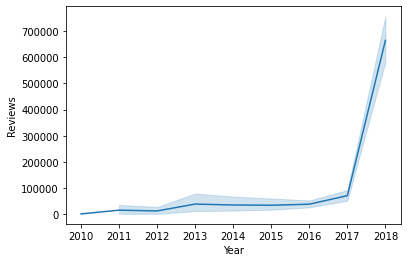

<AxesSubplot:xlabel='Year', ylabel='Reviews'>

In [24]:
sn.lineplot(data=df, x=df["Year"], y='Reviews')

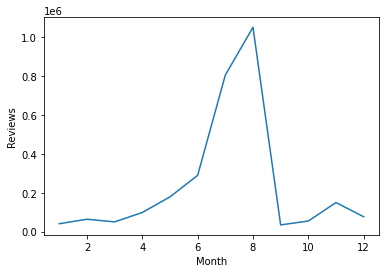

<AxesSubplot:xlabel='Month', ylabel='Reviews'>

In [25]:
sn.lineplot(data=df, x="Month", y='Reviews', ci=None)

In [26]:
df.corr()

,Rating,Reviews,Year,Month
Rating,1.000000,0.068724,0.136711,0.016984
Reviews,0.068724,1.000000,0.078947,0.047785
Year,0.136711,0.078947,1.000000,-0.175008
Month,0.016984,0.047785,-0.175008,1.000000


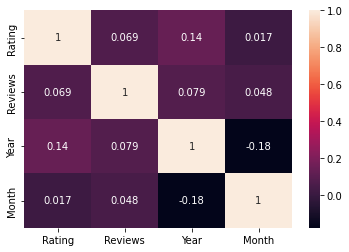

<AxesSubplot:>

In [27]:
sn.heatmap(df.corr(), annot=True)

In [32]:
df.to_csv(r'E:\Portofolio\Sql Project 3\Data Clean.csv', index = False) ## Import data cleaned